# Lesson 1 - Introduction to Pandas

## Lesson Video:

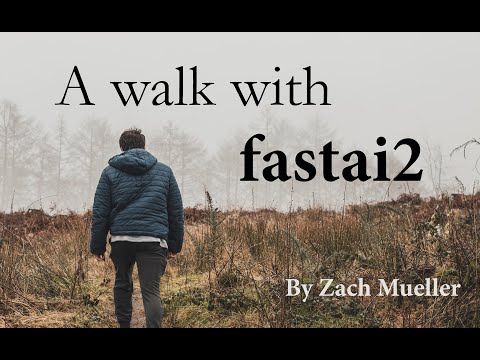

In [ ]:
#hide_input
from IPython.lib.display import YouTubeVideo
from datetime import timedelta
start = int(timedelta(minutes=0, seconds=0).total_seconds())
YouTubeVideo('liTHAhdl1cQ', start=start)

In [ ]:
#hide
#Run once per session
!pip install fastai wwf -q --upgrade

     |████████████████████████████████| 194kB 5.8MB/s 
     |████████████████████████████████| 61kB 5.6MB/s 


In [ ]:
#hide_input
from wwf.utils import state_versions
state_versions(['fastai','pandas'])


---
This article is also a Jupyter Notebook available to be run from the top down. There
will be code snippets that you can then run in any environment.

Below are the versions of `fastai` and `pandas` currently running at the time of writing this:
* `fastai`: 2.1.10 
* `pandas`: 1.1.5 
---

## Intro to Tabular and Pandas

Before we begin doing tabular modeling, let's learn about the `Pandas` library

Pandas? Like the bear? No!

`pandas` is a library we can use for reading and analyzing any bit of Tabular data. We'll work out of the newly released 1.0 version

In [ ]:
import pandas as pd

We do this by creating what are called `DataFrames`. These can come from a variety of forms. Most commonly:

* `read_csv`
* `read_excel`
* `read_feather`
* `read_html`
* `read_json`
* `read_pickle`
* `read_sql`
* `read_table`

We'll focus on the `read_csv` function. We'll use the Titanic dataset for today's tutorial

## Titanic

In [ ]:
!git clone https://github.com/pcsanwald/kaggle-titanic.git

Cloning into 'kaggle-titanic'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 19 (delta 0), reused 19 (delta 0), pack-reused 0
Unpacking objects: 100% (19/19), done.


Let's use the `Pathlib` library to read our data

In [ ]:
from fastai.basic_data import pathlib

In [ ]:
path = pathlib.Path('kaggle-titanic')

And look at what we grabbed

In [ ]:
path.ls()

[PosixPath('kaggle-titanic/train.csv'),
 PosixPath('kaggle-titanic/doc'),
 PosixPath('kaggle-titanic/.git'),
 PosixPath('kaggle-titanic/test.csv'),
 PosixPath('kaggle-titanic/.gitignore'),
 PosixPath('kaggle-titanic/README.md'),
 PosixPath('kaggle-titanic/test'),
 PosixPath('kaggle-titanic/project.clj'),
 PosixPath('kaggle-titanic/src')]

We can see that we have a `train.csv` and `test.csv` file. We'll work out of the `train` file today. Let's make our `DataFrame`

In [ ]:
df = pd.read_csv(path/'train.csv')

And now for some common functionalities:

## Pandas Functionalities:

### Head and Tail

`.head()` and `.tail()` will show the first and last few rows of a `DataFrame`. You can pass in `n` rows to look at (the default is 5)

In [ ]:
df.head(n=4)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [ ]:
df.tail(n=3)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Selecting

We can select a variety of ways in pandas: row, value, even by a column:

### Row:

There are two different ways we can select rows, `loc` and `iloc`. Each work a little differently

### `loc`

`loc` is used to get rows (or columns) with a particular **label** from an index. IE:

In [ ]:
df.loc[:3]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


Here we grabbed rows 0 through 3

### `iloc`
`iloc` is used when we want to get rows (or columns) from a *position* on an index

In [ ]:
df.iloc[:3]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Whereas here we grabbed the first three rows

### Column

We can pass in either a string, an index, or multiple columns to select:

In [ ]:
df['survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

To select multiple columns, pass in a double array of your names

In [ ]:
df[['sex', 'age', 'survived']].head()

,sex,age,survived
0,male,22.0,0
1,female,38.0,1
2,female,26.0,1
3,female,35.0,1
4,male,35.0,0


And to pass as an index, first do the number of rows followed by the column index

In [ ]:
df.iloc[:,0]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [ ]:
df.iloc[:,0:3]

,survived,pclass,name
0,0,3,"Braund, Mr. Owen Harris"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,1,3,"Heikkinen, Miss. Laina"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,0,3,"Allen, Mr. William Henry"
...,...,...,...
886,0,2,"Montvila, Rev. Juozas"
887,1,1,"Graham, Miss. Margaret Edith"
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie"""
889,1,1,"Behr, Mr. Karl Howell"


### Value

We can select based on a value a few different ways, most involving a boolean argument:

In [ ]:
# df.loc[df['column_name'] == some_value]

In [ ]:
df.loc[df['sex'] == 'female'].head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Or even a series of values:

In [ ]:
df.loc[(df['sex'] == 'female') & (df['survived'] == 0)].head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
14,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
18,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
24,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S
38,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S
40,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S


Now that we have the basic selects done, let's go into some more complex ideas

## Plotting

We can plot out any data we want from our `DataFrames`, like so:

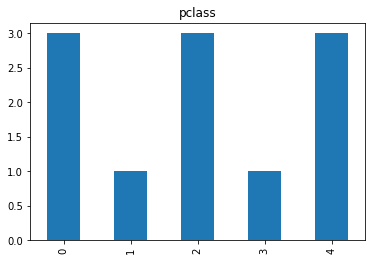

In [ ]:
df['pclass'].iloc[:5].plot(kind='bar', title='pclass')

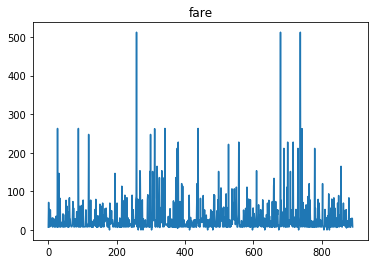

In [ ]:
df['fare'].plot(title='fare')

We can also plot multiple columns:

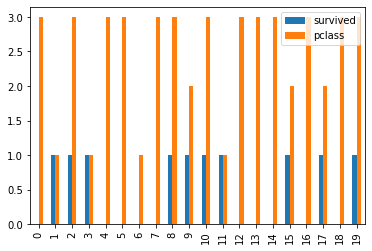

In [ ]:
df[['survived', 'pclass']][:20].plot(kind='bar')

## Dealing with multiple `DataFrames`

Sometimes, we have multiple dataframes of data. How do we combine them?

In [ ]:
df1 = df[['sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'name']].iloc[:50]
df2 = df[df.columns[:6]].iloc[:50]

### Merge

`merge` allows you to do standard database operations on a `DataFrame` or `Series`. Here is the doc line, let's break it down:
```python
pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
```

* `left` and `right` should be two `DataFrame` or `Series` objects. 
* `on` is a **column** or **index** name to join on and must be found in **both** dataframes. 
* `left_index` and `right_index` uses the respective input's index to use as a key instead
* `how`: Either `left`, `right`, `outer`, or `inner`. 

In [ ]:
df1.head()

,sibsp,parch,ticket,fare,cabin,embarked,name
0,1,0,A/5 21171,7.2500,NaN,S,"Braund, Mr. Owen Harris"
1,1,0,PC 17599,71.2833,C85,C,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,0,0,STON/O2. 3101282,7.9250,NaN,S,"Heikkinen, Miss. Laina"
3,1,0,113803,53.1000,C123,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,0,0,373450,8.0500,NaN,S,"Allen, Mr. William Henry"


In [ ]:
df2.head()

,survived,pclass,name,sex,age,sibsp
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0


Let's practice merging on `name`

In [ ]:
merge = pd.merge(df1, df2, on='name')

In [ ]:
merge.head()

,sibsp_x,parch,ticket,fare,cabin,embarked,name,survived,pclass,sex,age,sibsp_y
0,1,0,A/5 21171,7.2500,NaN,S,"Braund, Mr. Owen Harris",0,3,male,22.0,1
1,1,0,PC 17599,71.2833,C85,C,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,female,38.0,1
2,0,0,STON/O2. 3101282,7.9250,NaN,S,"Heikkinen, Miss. Laina",1,3,female,26.0,0
3,1,0,113803,53.1000,C123,S,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,female,35.0,1
4,0,0,373450,8.0500,NaN,S,"Allen, Mr. William Henry",0,3,male,35.0,0


### Appending

We can tag one dataframe onto another:

In [ ]:
df_top = df.iloc[:5]
df_bottom = df.iloc[5:10]

In [ ]:
len(df_top), len(df_bottom)

(5, 5)

In [ ]:
df_top.append(df_bottom)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Dropping

You can drop a column or row, and by default `pandas` will return the dropped table. If you choose to do `inplace`, it will directly modify the dataframe. You can also pass in an `axis` parameter. By default it is `1`, which will drop a row. `0` drops a column

In [ ]:
df_top.drop(0)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_top.drop('survived', axis=1)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_top.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## GroupBy

GroupBy can be used to split our data into groups if they fall into some criteria. 

```python
df_top.groupby(by=None, axis=0, level=None, as_index: bool=True, sort: bool=True, group_keys: bool=True, squeeze: bool=False, observed: bool=False)
```

Parameters:
* `by`: mapping, function, string or some iterable
* `axis`: default is 0
* `level`: If the axis is heirarchical, group by levels or a particular level
* `group_keys`: Add group keys to index to identify pieces

For an example, let's group by `survived`:

In [ ]:
surv = df.groupby('survived')

If we call `first`, we'll see the first entry in each group:

In [ ]:
surv.first()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
survived,,,,,,,,,,
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,E46,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


To grab the group, we can call `get_group` and pass in either one of our classes:

In [ ]:
surv.get_group(1)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...
875,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


We can also group by multiple columns. Let's combine both `survived` and `sex`

In [ ]:
surs = df.groupby(['survived', 'sex'])

In [ ]:
surs.first()

pclass  ... embarked
survived sex             ...         
0        female       3  ...        S
         male         3  ...        S
1        female       1  ...        C
         male         2  ...        S

[4 rows x 9 columns]

Now we can further analyze and split our data based on whatever queries we want to use!

## Map

`map` can be used to map values from two different `series` (column) that share a same column. Basically we can repeat our adjust values:

In [ ]:
type(df['survived'])

pandas.core.series.Series

In [ ]:
df['survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

We can use a function or a dictionary:

In [ ]:
df['survived'].map({0:'dead', 1:'survived'}).head()

0        dead
1    survived
2    survived
3    survived
4        dead
Name: survived, dtype: object

In [ ]:
df['survived'].map('I am a {}'.format).head()

0    I am a 0
1    I am a 1
2    I am a 1
3    I am a 1
4    I am a 0
Name: survived, dtype: object

## .apply

Apply let's you pass in a function to apply to every value in a series. It takes in a function, `convert_dtype`, and some argumetns

Let's make a basic one that returns if someone survived:

In [ ]:
def lived(num):
  if num == 0:
    return "Died"
  else:
    return "Lived"

In [ ]:
new = df['survived'].apply(lived)

In [ ]:
new.head()

0     Died
1    Lived
2    Lived
3    Lived
4     Died
Name: survived, dtype: object

We can also use a lambda:

In [ ]:
new = df['age'].apply(lambda age: age + 5)

In [ ]:
print(f'{df["age"].head()}\n{new.head()}')

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64
0    27.0
1    43.0
2    31.0
3    40.0
4    40.0
Name: age, dtype: float64
